In [20]:
import re
import os
from bitstring import BitArray
import struct
import string
from random import choice
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Binary string to DNA strand

In [13]:
# function to remove whitespaces in the string:
def Spaceremoval(input_string):
    return input_string.translate({ord(c): None for c in string.whitespace})

In [14]:
# Function to check whether two binary string is equal:
def Matching(input1,input2):
    if input1 == input2:
        print ('They are matched!')
    else:
        print ('Opps!')
        

In [15]:
# Function to convert string to binary:
def StringtoBinary(input_string):
    return ''.join(format(ord(x), 'b') for x in input_string)

In [16]:
# Function to convert audio file into binary 
def AudiotoBinary(file_path):
    b=BitArray(bytes=open(file_path,'rb').read())
    # Store result
    with open('filename_bits.txt', 'w') as file1: 
        return b.bin


In [17]:
# Function to compress file using Huffman coding


In [7]:
# Function to encode Binary to DNA strands
def BinarytoDNA(input_string):
    i=0
    DNA = []
    while i in range(len(input_string)):
        if (len(input_string) - i > 2):
            if(input_string[i]== '1') and (input_string[i] == input_string[i+1]) and (input_string[i+1] == input_string[i+2]):
                DNA.append('CG')
                i += 3
            elif (input_string[i]== '1') and (input_string[i] == input_string[i+1]):
                DNA.append('CA')
                i += 2
            elif (input_string[i]== '1') and (input_string[i] != input_string[i+1]):
                DNA.append('CT')
                i+= 1
            elif((input_string[i] == input_string[i+1]) and (input_string[i+1] == input_string[i+2])):
                DNA.append('G')
                i += 3
            elif (input_string[i] == input_string[i+1]):
                DNA.append('A')
                i += 2
            else:
                DNA.append('T')
                i+= 1
        elif (len(input_string) - i -1 == 2):
            if(input_string[i]== '1') and (input_string[i] == input_string[i+1]) and (input_string[i+1] == input_string[i+2]):
                DNA.append('CG')
                break
            elif (input_string[i]== '1') and (input_string[i] == input_string[i+1]):
                DNA.append('CA') 
                i += 2
            elif (input_string[i]== '1') and (input_string[i] != input_string[i+1]):
                DNA.append('CT')
                i+= 1
            elif ((input_string[i] == input_string[i+1]) and (input_string[i+1] == input_string[i+2])):
                DNA.append('G')
                break
            elif (input_string[i] == input_string[i+1]):
                DNA.append('A')
                i += 2
            else:
                DNA.append('T')
                i+= 1
        elif (len(input_string) -1-i == 1):
            if(input_string[i]== '1') and (input_string[i] == input_string[i+1]):
                DNA.append('CA')
                break
            elif (input_string[i]== '1') and (input_string[i] != input_string[i+1]):
                DNA.append('CT')
                i+= 1
            elif (input_string[i] == input_string[i+1]):
                DNA.append('A')
                break
            elif (input_string[i] != input_string[i+1]):
                DNA.append('T')
                i+= 1
        elif (input_string[i] == '1'):
            DNA.append('CT')
            break
        else:
            DNA.append('T')
            break
        
    return ''.join(string for string in DNA)

In [36]:
# function to decode DNA to Binary string
def DNAtoBinary(input_string):
    i=0
    Binary=[]
    input_string = input_string.translate({ord(c): None for c in string.whitespace})   
    while i in range(len(input_string)):
        if (len(input_string) -i > 2):
            if input_string[i] == 'C' and input_string[i+1] == 'C':
                i+=1
            elif input_string[i] == 'C' and input_string[i+1] == 'G':
                Binary.append('111')
                i+=2
            elif input_string[i] == 'C' and input_string[i+1] == 'A':
                Binary.append('11')
                i+=2
            elif input_string[i] == 'C' and input_string[i+1] == 'T':
                Binary.append('1')
                i+=2
            elif input_string[i] == 'G':
                Binary.append('000')
                i+=1
            elif input_string[i] == 'A':
                Binary.append('00')
                i+=1
            elif input_string[i] == 'T':
                Binary.append('0')
                i+=1
        elif (len(input_string) - i - 1 == 1):
            if input_string[i] == 'C' and input_string[i+1] == 'C':
                break
            if input_string[i] == 'C' and input_string[i+1] == 'G':
                Binary.append('111')
                break
            elif input_string[i] == 'C' and  input_string[i+1] == 'A':
                Binary.append('11')
                break
            elif input_string[i] and input_string[i+1] == 'T':
                Binary.append('1')
                break
            elif input_string[i] == 'G':
                Binary.append('000')
                i+=1
            elif input_string[i] == 'A':
                Binary.append('00')
                i+=1
            elif input_string[i] == 'T':
                Binary.append('0')
                i+=1
        elif (len(input_string) - i - 1 == 0):
            if input_string[i] == 'G':
                Binary.append('000')
                break
            elif input_string[i] == 'A':
                Binary.append('00')
                break
            elif input_string[i] == 'T':
                Binary.append('0')
                break
            elif input_string[i] == 'C':
                break
    return ''.join(string for string in Binary)
            

In [38]:
%%time
DNA = ''.join(choice(['A','T','G','C']) for i in range(100000000))
result = DNAtoBinary(DNA)

CPU times: user 1min 49s, sys: 1.63 s, total: 1min 50s
Wall time: 1min 50s


In [9]:
# Textfile sample: Shakepeare fisrt paragraph of Sonnets: 639 bytes = 5112 bits
shakepeare = "From fairest creatures we desire increase,   That thereby beauty's rose might never die,   But as the riper should by time decease,   His tender heir might bear his memory:   But thou contracted to thine own bright eyes,   Feed'st thy light's flame with self-substantial fuel,   Making a famine where abundance lies,   Thy self thy foe, to thy sweet self too cruel:   Thou that art now the world's fresh ornament,   And only herald to the gaudy spring,   Within thine own bud buriest thy content,   And tender churl mak'st waste in niggarding:     Pity the world, or else this glutton be,     To eat the world's due, by the grave and thee."
binary = StringtoBinary(shakepeare)
DNA = BinarytoDNA(binary)
binary2 = DNAtoBinary(DNA)
# Checking if these two binary strings match

Matching(binary,binary2)

They are matched!


In [39]:
%%time
# Audiofile Sample : 700kB mp3 audio file
Audio = AudiotoBinary('Audiosample700KB.mp3')
DNA2 = BinarytoDNA(Audio)
Audio2 = DNAtoBinary(DNA2)
Matching(Audio,Audio2)

They are matched!
CPU times: user 6.08 s, sys: 61.6 ms, total: 6.14 s
Wall time: 6.14 s


In [22]:
len(DNA2)

5292189

In [ ]:
%%time
# Testing decode
DNAstrand = ''.join(choice(['A','T','G','C']) for i in range(100000))
DNAtoBinary(DNAstrand)

In [ ]:

# Calculate time complexity
nts = [100,1000,10000,100000,200000,500000,1000000,2000000]
time_exe = []
for n in nts:
    # time start
    start=time.time()
    DNAtoBinary(''.join(choice(['A','T','G','C']) for i in range(n)))
    end=time.time()
    time_exe.append(end-start)


In [27]:
# Function to calculate time complexity with n number of nucleotides
def timecomplexity(nts):
    time_exe = []
    for n in nts:
        # time start
        binary = ''.join(choice(['A','T','G','C']) for i in range(n))
        start=time.process_time_ns()
        # DNA to Binary with length of n bases
        DNAtoBinary(binary)
        #time end
        end=time.process_time_ns()
        time_exe.append(end-start)
    return time_exe



In [47]:
nts = [1,10,20,100,200,1000,2000,10000,20000,100000,200000,1000000,2000000,10000000,2000000]
time_exe = timecomplexity(nts)


(1.0, 10000010.0)

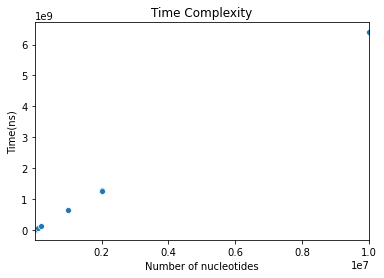

In [50]:
sns.scatterplot(x=nts,y=time_exe)
plt.title('Time Complexity')
plt.xlabel('Number of nucleotides')
plt.ylabel('Time(ns)')